## Ejemplo 1: conversión serie a paralelo



Se desea diseñar una red de adaptación para transformar una carga de $R_L = 50 \Omega$ para que presente a el colector de un transistor una resistencia de $R_L' = 1000 \Omega$ a la frecuencia de $f_o = 2 MHz$. Por simplicidad, suponemos que todos los componentes no tienen perdidas (son ideales) y que la salida del transistor presenta una admitancia resistiva pura.

![11-cuatrocientos](fig/ejercicio1.png)

Para resolver este diseño, debemos primero realizar la conversión de serie a paralelo del inductor y la resistencia.
Esta conversión tiene que darnos como resultado una resistencia paralelo de $R_L' = 1000 \Omega$.
La conversión de serie a paralelo depende del valor de $Q_m$ ($Q$ de matching).

$$R_p = R_s (1 + Q_m^2)$$

$$Q_m =  \sqrt{\frac{R_p}{R_s} -1}$$

$$Q_m =  \sqrt{\frac{1000}{50} -1}= 4.36$$


Entonces con un $Q_m = 4.36$ la resistencia del circuito paralelo se comporta como una resistencia de $R_p = 1000 \Omega$.

Debemos conocer el valor del inductor que permite tener un $Q_m = 4.36$. Dado que el valor que queremos conocer corresponde al inductor $L$ serie, empleamos el calculo del $Q_m$ del circuito serie (recordando que la corriente es el parametro común para el calculo de la potencia en ambos componentes).

$$Q_m =  \frac{i^2 X_L}{i^2 r_s}$$

$$Q_m =  \frac{X_L}{r_s}$$

$$X_L = Qm r_s = 4.36 \cdot 50 \Omega = 217.94 \Omega$$

siento $X_L = w_o \cdot L$, donde $w_o = 2 \pi f_o$. Entonces,

$$L = \frac{X_L}{2 \pi f_o}$$


$$L = \frac{217.94 \Omega}{2 \pi 2\times 10^6 Hz} = 17.3 \mu Hz$$

Para obtener el valor de $C$, necesitamos conocer el valor del inductor correspondiente al circuito paralelo. Debemos calcular su valor para el circuito paralelo.

$$X_p = X_s (1 +  \frac{1}{Q_m^2})$$

$$X_L' = X_L (1 +  \frac{1}{Q_m^2})$$

$$X_L' = 217.94 \Omega (1 +  \frac{1}{4.36^2})= 229.41 \Omega$$

El valor que resuena con el capacitor entonces es $X_C = X_L'$, siendo $X_C = \frac{1}{w_o \cdot C}$. Hacemos entonces el calculo del valor del capacitor $C$.

$$C = \frac{1}{w_o \cdot X_C}$$

$$C = \frac{1}{2 \pi 2\times 10^6 Hz \cdot 229.41 \Omega} = 346.8 pF$$



Como vemos en este ejemplo, se logra la adaptación de la resistencia mediante la conversión de serie a paralelo. Dado que se emplean solo dos componentes reactivos, el $Q_c$ queda impuesto por el circuito y no puede ser modificado sin afectar la adaptación.  



.param rg =  1.0000e+03 
.param C  =  3.4687e-10 
.param L  =  1.7344e-05 
.param Rl =  5.0000e+01 


/home/aalmela/scm/git/utn/eaiii/eaiii_2021/2_Circuitos_de_adaptacion/1_Didactica/myplot.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


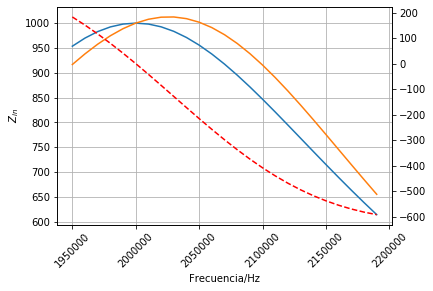

In [13]:
import myplot as myp
import numpy as np
import matplotlib.pyplot as plt
import csv



# Datos 
Rg = 1000
Rl = 50
fo = 2e6
wo = 2*np.pi*fo

Qm  = ((Rg/Rl)-1)**0.5      # Caclulo del Qm

XL  = Qm * Rl               # Caclulo de XL

L   = XL/wo                 # Calculo de LÇ

XLp = XL *(1+1/Qm**2)       # Conversion de L paralelo
XC  = XLp
C   = 1/(2*np.pi*fo*XC)    # Conversion de C de sintonia

print('.param rg =  {:1.4e} '.format(Rg) )
print('.param C  =  {:1.4e} '.format(C) )
print('.param L  =  {:1.4e} '.format(L) )
print('.param Rl =  {:1.4e} '.format(Rl) )

# Ahora calculando en la hoja de calculo 
f =  np.arange(1.95e6,2.2e6,10e3)                   # Defino el array de frecuencia
w = 2*np.pi*f
Qc = Rg/XLp

Zsimp = Rg/(1+1j*Qc*(f/fo-fo/f))   

Zfull = (1/(1j*w*C))*(Rl+1j*w*L)/((1/(1j*w*C))+(Rl+1j*w*L))


myp.PlotCpx(f,Zsimp , labelx = 'Frecuencia/Hz', labely = '$Z_{in}$')

myp.PlotCpx(f,Zfull , labelx = 'Frecuencia/Hz', labely = '$Z_{in}$')

#plt.savefig('figures/converSerPAr.png')

plt.show()



